In [1]:
import string
import nltk
import time

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [2]:
df = pd.read_csv('ecommerceDataset.csv')
df.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [3]:
stopwords = set(stopwords.words('english')) 
stemmer = nltk.stem.SnowballStemmer('english') 
from nltk.stem import WordNetLemmatizer

In [4]:
df.columns

Index(['Household', 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and s

In [5]:
df.columns =['Class', 'Description']

In [6]:
df.head()

,Class,Description
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [7]:
df['Class'].value_counts()

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

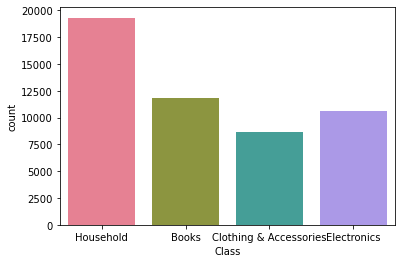

In [8]:
sns.countplot(x="Class", data=df, palette="husl")


In [9]:
df.isnull().sum()

Class          0
Description    1
dtype: int64

In [10]:
df. dropna(subset = ["Description"], inplace=True)

In [11]:
df.isnull().sum()

Class          0
Description    0
dtype: int64

In [12]:
df.shape

(50423, 2)

In [13]:
#Encoding Categorical Data
df['Class'] = df['Class'].map({'Household': 0, 'Books': 1, 'Electronics': 2 , 'Clothing & Accessories': 3})
df['Class'] = df['Class'].astype('int')

In [14]:
df.head()

,Class,Description
0,0,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,0,SAF 'UV Textured Modern Art Print Framed' Pain...
2,0,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,0,Incredible Gifts India Wooden Happy Birthday U...
4,0,Pitaara Box Romantic Venice Canvas Painting 6m...


In [15]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df['Description'] = [BeautifulSoup(text).get_text() for text in df['Description']] 
df['Description'] = df['Description'].apply(remove_punctuations)

In [16]:
lemmatizer = WordNetLemmatizer()

index=0
str=' '
final_string=[]
s=''
for sent in df['Description'].values:
    filtered_sentence=[]
    for word in sent.split():
        if((word.isalpha()) & (len(word)>2)):    
            if(word.lower() not in stopwords):
                s=(lemmatizer.lemmatize(word.lower()))
                #print(s)
                filtered_sentence.append(s)
            else:
                continue
        else:
            continue     
    str = " ".join(filtered_sentence)     
    final_string.append(str)
    index+=1

In [17]:
df['Description']=final_string
df['Description'].head()

0    saf floral framed painting wood inch inch spec...
1    saf textured modern art print framed painting ...
2    saf flower print framed painting synthetic inc...
3    incredible gift india wooden happy birthday un...
4    pitaara box romantic venice canvas painting th...
Name: Description, dtype: object

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(df['Description'], df['Class'], test_size = 0.3, random_state = 42)


In [19]:
#TF_IDF
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_train = tf_idf_vect.fit_transform(xtrain.values)
tf_idf_test = tf_idf_vect.transform(xtest.values)

In [20]:
times = []

In [21]:
#svm = SVC(kernel='rbf')
svm = LinearSVC()
#start = time.time()
svm.fit(tf_idf_train, ytrain)
# end = time.time()
# times.append(end - start)
y_pred = svm.predict(tf_idf_test)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5848
           1       0.99      0.97      0.98      3483
           2       0.98      0.97      0.97      3178
           3       0.98      0.99      0.99      2618

    accuracy                           0.98     15127
   macro avg       0.98      0.98      0.98     15127
weighted avg       0.98      0.98      0.98     15127



Test accuracy is:  0.980696767369604


<AxesSubplot:>

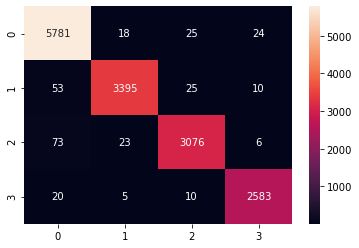

In [22]:
acc = accuracy_score(ytest, y_pred, normalize=True)#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print('Test accuracy is: ',(acc))

cm_test = confusion_matrix(ytest,y_pred)
sns.heatmap(cm_test,annot=True,fmt='d')

In [23]:

k = 4
#start = time.time()
neigh = KNeighborsClassifier(n_neighbors = k).fit(tf_idf_train,ytrain)
# end = time. time()
# times.append(end - start)
yhat = neigh.predict(tf_idf_test)

In [24]:
print("Train set Accuracy: ", metrics.accuracy_score(ytrain, neigh.predict(tf_idf_train)))
print("Test set Accuracy: ", metrics.accuracy_score(ytest, yhat))
print(classification_report(ytest, yhat))

Train set Accuracy:  0.975181323662738
Test set Accuracy:  0.9596086467905071
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5848
           1       0.97      0.95      0.96      3483
           2       0.97      0.93      0.95      3178
           3       0.98      0.96      0.97      2618

    accuracy                           0.96     15127
   macro avg       0.96      0.96      0.96     15127
weighted avg       0.96      0.96      0.96     15127



<AxesSubplot:>

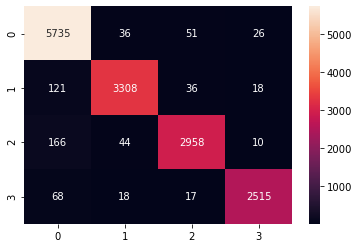

In [25]:
cm_test = confusion_matrix(ytest,yhat)
sns.heatmap(cm_test,annot=True,fmt='d')

In [26]:
D_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 25)
#start = time.time()
D_Tree.fit(tf_idf_train,ytrain)
# end = time. time()
# times.append(end - start)
predTree = D_Tree.predict(tf_idf_test)

In [27]:
print("DecisionTrees's Accuracy: ", accuracy_score(ytest, predTree, normalize=True))#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print(classification_report(ytest, predTree))

DecisionTrees's Accuracy:  0.8365174852912012
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      5848
           1       0.68      0.95      0.79      3483
           2       0.87      0.79      0.83      3178
           3       0.96      0.89      0.93      2618

    accuracy                           0.84     15127
   macro avg       0.86      0.85      0.85     15127
weighted avg       0.86      0.84      0.84     15127



<AxesSubplot:>

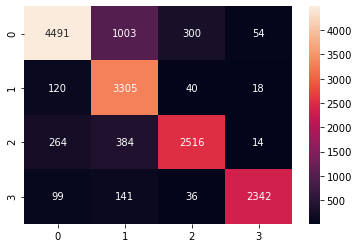

In [28]:
cm_test = confusion_matrix(ytest,predTree)
sns.heatmap(cm_test,annot=True,fmt='d')

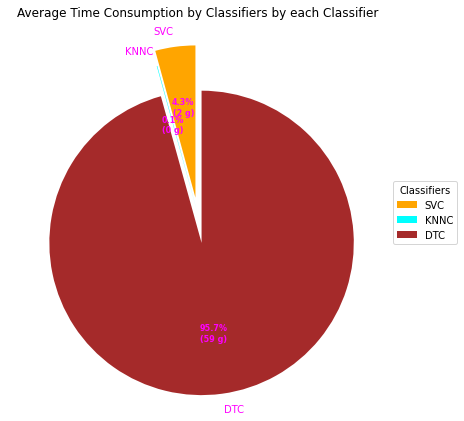

In [30]:
#Average Time
time = [2.635192156, 0.03588013649, 59.32828169]

classifiers = ['SVC', 'KNNC', 'DTC']
# Creating explode data
explode = (0.1, 0.0, 0.2)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(time,
                                  autopct = lambda pct: func(pct, time),
                                  explode = explode,
                                  labels = classifiers,
                                  colors = colors,
                                  startangle = 90,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, classifiers,
          title ="Classifiers",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Average Time Consumption by Classifiers by each Classifier")
 
# show plot
plt.show()

KNN performing good as compared to other classifiers in term of accuracy and time. We have to increase the depth of DTC to get desired which result in too much computation overhead.

In case of SVC if we use SVC converge slower as compared to LinearSVC which I have observed and that is why using LinearSVC.